In [79]:
import numpy as np
import pandas as pd

In [81]:
df = pd.read_csv('Spam_SMS.csv')

In [83]:
df.head(5)

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [85]:
df.shape

(5574, 2)

# stages
### 1. Data cleaning
### 2. EDA (Exploratory data analysis)
### 3. Text Preprocessing
### 4. Model building
### 5. Evaluation
### 6. Improvement bases of evaluation

## Data Cleaning

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5574 non-null   object
 1   Message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [89]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [91]:
df['Class'] = encoder.fit_transform(df['Class'])

In [93]:
df.head()

,Class,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [95]:
#here '0'=ham and '1'= spam

In [97]:
# missing values
df.isnull().sum()

Class      0
Message    0
dtype: int64

In [99]:
# check for duplicate values
df.duplicated().sum()

415

In [101]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [103]:
# checking the duplicates once again
df.duplicated().sum()

0

In [105]:
df.shape

(5159, 2)

## EDA

In [108]:
#It helps us understanding the data.

In [110]:
#here we check how many are spam and ham
df['Class'].value_counts()

Class
0    4518
1     641
Name: count, dtype: int64

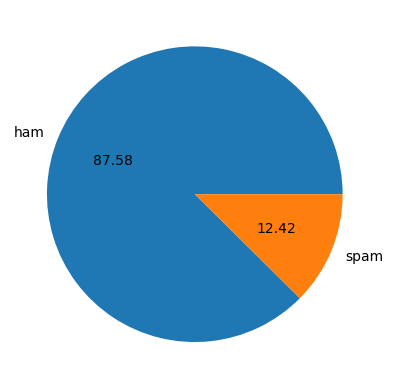

In [112]:
import matplotlib.pyplot as plt
plt.pie(df['Class'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [43]:
# Here we can see that there is data imbalance

In [44]:
import nltk

In [45]:
!pip install nltk

In [46]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [114]:
# here we are making column for num of characters in message
df['num_characters'] = df['Message'].apply(len)

In [116]:
df.head()

,Class,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [118]:
# here we are basically breaking sentence into word by word
# column for num of words
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [119]:
df.head()

,Class,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [122]:
# column for num of sentence
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [124]:
df.head()

,Class,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [126]:
# now we need to check what is happenig in three new colums which we have made
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5159.000000,5159.000000,5159.000000
mean,79.130064,18.596821,1.970731
std,58.289063,13.406675,1.455997
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [128]:
#here we are checking description of ham messages
df[df['Class'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4518.000000,4518.000000,4518.000000
mean,70.861000,17.302125,1.827579
std,56.584513,13.592056,1.394245
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [130]:
#here we are checking description of spam messages
df[df['Class'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.413417,27.722309,2.979719
std,29.998996,7.032577,1.483627
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [132]:
# Now we are plotting histogram for more clearity of characters in both
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

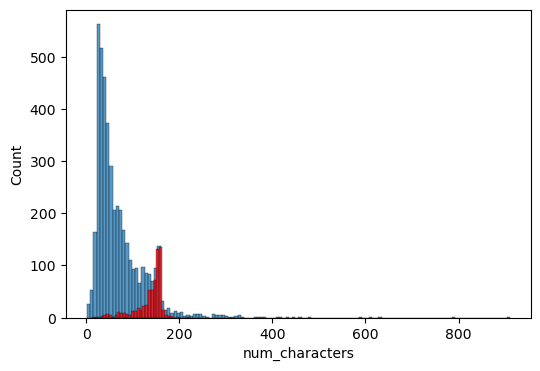

In [134]:
plt.figure(figsize=(6,4))
sns.histplot(df[df['Class'] == 0]['num_characters'])              #for ham
sns.histplot(df[df['Class'] == 1]['num_characters'],color='red')  #for spam

<Axes: xlabel='num_words', ylabel='Count'>

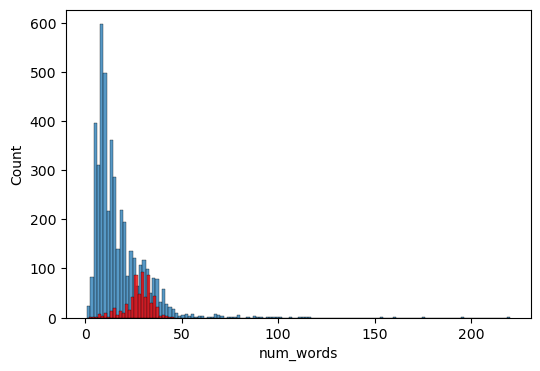

In [136]:
# now for words
plt.figure(figsize=(6,4))
sns.histplot(df[df['Class'] == 0]['num_words'])                #for ham
sns.histplot(df[df['Class'] == 1]['num_words'],color='red')    #for spam

<Axes: xlabel='num_sentences', ylabel='Count'>

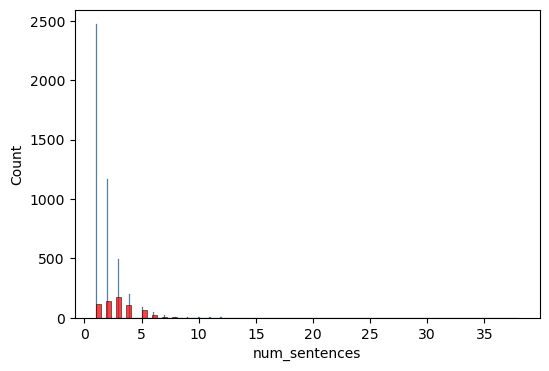

In [138]:
# now for sentence
plt.figure(figsize=(6,4))
sns.histplot(df[df['Class'] == 0]['num_sentences'])                #for ham
sns.histplot(df[df['Class'] == 1]['num_sentences'],color='red')    #for spam

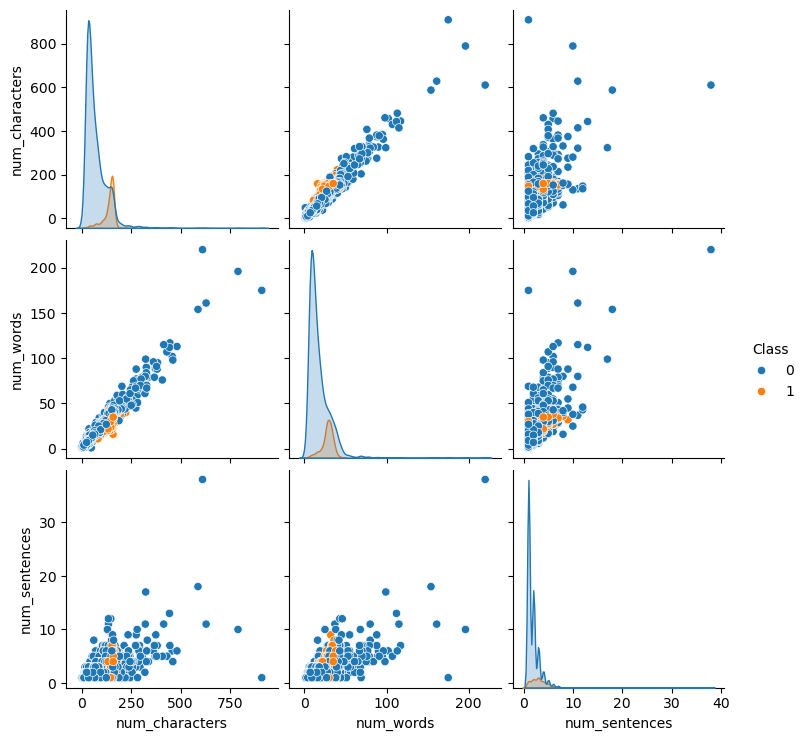

In [139]:
# we are checking relation ship b/w the columns
sns.pairplot(df,hue='Class')

In [141]:
# there are many outlyers in this

# Data(text) Preprocessing
### a) Lower case
### b) Tokenization (seperate in words)
### c) Removing special characters
### d) Removing stop words and punctuation
### e) Stemming (eg: dance,dancing the meaning of both are same so we convert these words into the one like in this we convert it into dance)

In [143]:
#these words are the words which have no contribution in the meaning of the sentence it helps only in sentence formation
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [166]:
#these all are the punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [168]:
def transform_Message(Message):
    Message = Message.lower()
    Message = nltk.word_tokenize(Message)
    
    y = []
    for i in Message:
        if i.isalnum():
            y.append(i)

    Message = y[:] #here we colone the text
    y.clear()

    #here we remove the stopwords and punctuation
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    Message = y[:]
    y.clear()
    
    for i in Message:
        y.append(ps.stem(i)) #here we are doing stemming

    
    return " ".join(y)

In [170]:
transform_Message('hello how are you dancing?')

'hello danc'

In [172]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [174]:
df['transformed_Message'] = df['Message'].apply(transform_Message)

In [157]:
df.head()

,Class,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [175]:
# Now we are using word cloud this help us to maximise the important words in the message 
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [176]:
spam_wc = wc.generate(df[df['Class'] == 1]['transformed_Message'].str.cat(sep=" "))

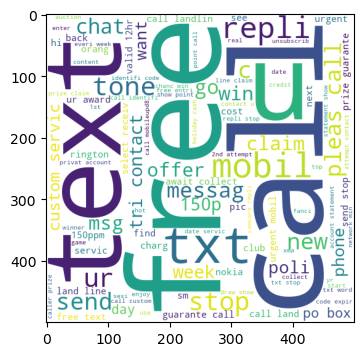

In [180]:
plt.figure(figsize=(6,4))
plt.imshow(spam_wc)

In [182]:
ham_wc = wc.generate(df[df['Class'] == 0]['transformed_Message'].str.cat(sep=" "))

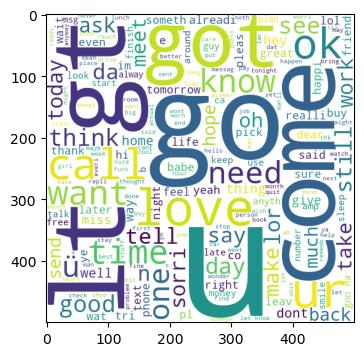

In [184]:
plt.figure(figsize=(6,4))
plt.imshow(ham_wc)

# For finding out top 30 words in ham and spam messages or which words are using mostly 


In [186]:
#for spam
spam_corpus = []
for msg in df[df['Class'] == 1]['transformed_Message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [188]:
len(spam_corpus) #these many are the words in spam

9792

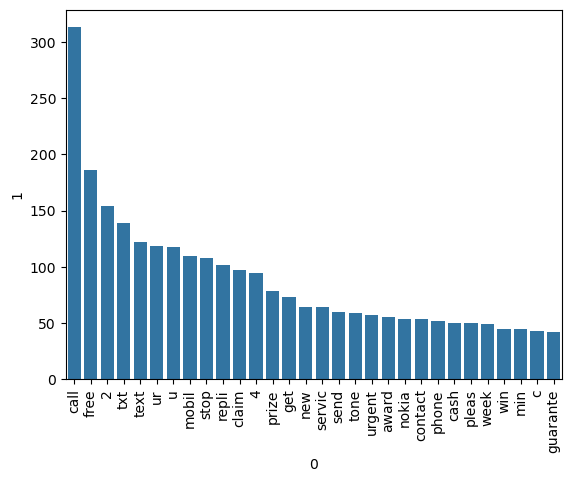

In [190]:
#these are the top 30 words in spam
from collections import Counter
spam_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=[0, 1])
sns.barplot(x=0, y=1, data=spam_counts)
plt.xticks(rotation='vertical')
plt.show()

In [192]:
#for ham
ham_corpus = []
for msg in df[df['Class'] == 0]['transformed_Message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [194]:
len(ham_corpus) #these many are the words in ham

35953

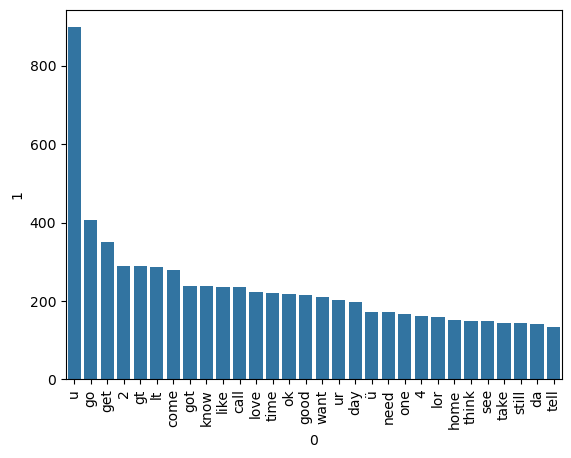

In [196]:
#these are the top 30 words in ham
from collections import Counter
ham_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=[0, 1])
sns.barplot(x=0, y=1, data=ham_counts)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

### Here we are using Naive Bayes algo bcz Naive Bayes works good on textual data

In [199]:
#here we need to convert the text into vectors or we can say in numbers 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [201]:
#X = cv.fit_transform(df['transformed_Message']).toarray()
X = tfidf.fit_transform(df['transformed_Message']).toarray()

In [203]:
X.shape

(5159, 3000)

In [205]:
y = df['Class'].values

In [207]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [209]:
#Here we are applying train test split 
from sklearn.model_selection import train_test_split

In [211]:
#here we are giving 20% of data for test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [213]:
#here we are calling algos bcz I don't know the distribution of Data
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [215]:
#here we are makng object of the algos which we have imported
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [269]:
#here we train the data
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8682170542635659
[[788 121]
 [ 15 108]]
0.47161572052401746


In [217]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9757751937984496
[[908   1]
 [ 24  99]]
0.99


In [273]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835271317829457
[[905   4]
 [ 13 110]]
0.9649122807017544


# so here we have choosen tfidf-=> MNB bcz it will giving us good precision


In [ ]:
# so we are using naive base algo

In [ ]:
# model improving
# 1. Change the max_features parameter of TfIdf

In [320]:
# Ensure all arrays have the same length
algorithms = list(clfs.keys())
max_length = max(len(algorithms), len(accuracy_scores), len(precision_scores))

# Pad shorter lists with None or np.nan
algorithms += [None] * (max_length - len(algorithms))
accuracy_scores += [np.nan] * (max_length - len(accuracy_scores))
precision_scores += [np.nan] * (max_length - len(precision_scores))

# Create the DataFrame
temp_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores
}).sort_values(by='Precision_max_ft_3000', ascending=False)

In [310]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [312]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [314]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [316]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [318]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.922481,1.000000,0.922481,1.000000,0.922481,1.000000,0.922481,1.000000
1,NB,0.975775,0.990000,0.975775,0.990000,0.975775,0.990000,0.975775,0.990000
2,ETC,0.975775,0.990000,NaN,NaN,NaN,NaN,NaN,NaN
3,RF,0.973837,0.989796,0.973837,0.989796,0.973837,0.989796,0.973837,0.989796
4,SVC,0.975775,0.971154,0.975775,0.971154,0.975775,0.971154,0.975775,0.971154
5,xgb,0.969961,0.942308,NaN,NaN,NaN,NaN,NaN,NaN
6,GBDT,0.952519,0.940476,NaN,NaN,NaN,NaN,NaN,NaN
7,LR,0.959302,0.935484,0.959302,0.935484,0.959302,0.935484,0.959302,0.935484
8,AdaBoost,0.960271,0.894231,0.960271,0.894231,0.960271,0.894231,0.960271,0.894231
9,BgC,0.960271,0.866071,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))